In [1]:
# !pip install --upgrade tensorboard==2.2.0
# !pip install --upgrade tensorflow-estimator==2.2.0rc0

In [2]:
# !pip install -q tensorflow-gpu

In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

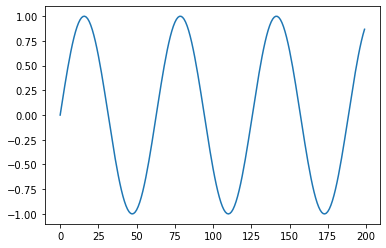

In [5]:
# make the original data
series = np.sin(0.1 * np.arange(200)) #+ np.random.randn(200) * 0.1

# plot it
plt.plot(series)
plt.show()

In [6]:
### build the dataset
# let's see if we can use T past values to predict the next value
T =10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, ", Y.shape:", Y.shape)


X.shape: (190, 10) , Y.shape: (190,)


In [7]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
# x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80


2022-03-14 15:25:33.557380: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 51ms/step - loss: 1.4941 - val_loss: 0.1117
Epoch 2/80
3/3 [==============================] - 0s 10ms/step - loss: 0.5264 - val_loss: 0.7351
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 0.6687 - val_loss: 0.1839
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0959 - val_loss: 0.1165
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.2759 - val_loss: 0.2203
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.2243 - val_loss: 0.0296
Epoch 7/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0229 - val_loss: 0.0702
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1031 - val_loss: 0.0946
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0743 - val_loss: 0.0058
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0101 - val_loss: 0.0496
Epoch 11/80
3/3 [=======================

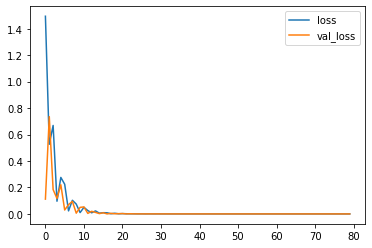

In [8]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# input of first vlidation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

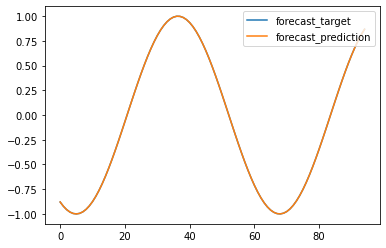

In [10]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

In [11]:
# Forecast future values (use only self-predictions for making future predictions)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T, 10
# print(len(validation_target)) -> 95
# print(last_x) -> [A, B, ...]
print(last_x.reshape(1, -1)) #-> [[A, B, ...]]
print(model.predict(last_x.reshape(1, -1))[0,0])
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
#   print("before:", last_x)
  last_x = np.roll(last_x, -1)
#   print("after:", last_x)
  last_x[-1] = p

[[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
  -0.62507065 -0.69987469 -0.76768581 -0.82782647]]
-0.8797004


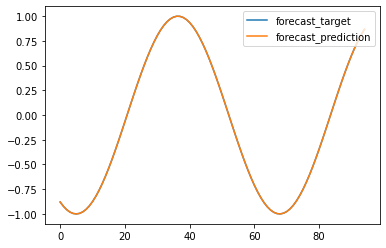

In [12]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

## Noise examples

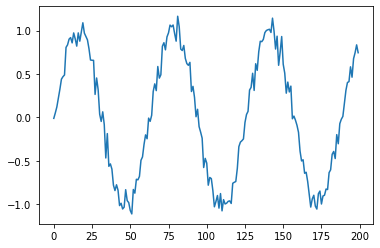

In [13]:
# make the original data (with noise)
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

# plot it
plt.plot(series)
plt.show()

In [14]:
### build the dataset
# let's see if we can use T pas values to predict the next value
T =10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, ", Y.shape:", Y.shape, ", N:", N)

X.shape: (190, 10) , Y.shape: (190,) , N: 190


In [15]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 47ms/step - loss: 0.5991 - val_loss: 0.4679
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.4331 - val_loss: 0.1291
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1403 - val_loss: 0.1501
Epoch 4/80
3/3 [==============================] - 0s 9ms/step - loss: 0.1430 - val_loss: 0.0472
Epoch 5/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0607 - val_loss: 0.1016
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0931 - val_loss: 0.0491
Epoch 7/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0500 - val_loss: 0.1110
Epoch 8/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0862 - val_loss: 0.0728
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0549 - val_loss: 0.0545
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0548 - val_loss: 0.0363
Epoch 11/80
3/3 [==========================

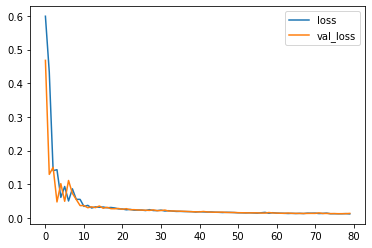

In [16]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [23]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# input of first vlidation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

In [24]:
print(validation_target)

[-1.03006892 -0.97054802 -0.90002603 -1.04537815 -0.87775016 -1.07687349
 -0.94765871 -0.99767347 -0.98854811 -0.96746258 -0.96187321 -0.99150454
 -0.75915849 -0.74770433 -0.73881128 -0.58667411 -0.33705834 -0.28516384
 -0.26857254 -0.24787451 -0.05842074  0.0333968   0.06969565  0.31572135
  0.34596613  0.50865344  0.31097853  0.61851735  0.54235549  0.75577906
  0.8775509   0.87305775  0.89903941  0.97723233  1.00193924  1.01021774
  1.01596678  0.97895609  1.1438837   0.99484472  0.78793536  0.9360514
  0.60067947  0.75080055  0.9321098   0.6127353   0.51062216  0.27931455
  0.40712242  0.29358277  0.36065506 -0.01552232  0.01512626 -0.03168701
 -0.09055745 -0.17180865 -0.38750148 -0.50198593 -0.48808333 -0.6440842
 -0.63195026 -0.7390351  -0.88836416 -1.03324726 -0.93921039 -0.89717663
 -1.02200496 -1.0561271  -0.87972227 -0.84889081 -0.99788438 -0.90537247
 -0.8969171  -0.8256215  -0.83107574 -0.63606335 -0.60384074 -0.42549704
 -0.3923438  -0.47389083 -0.19848861 -0.30347237 -0.0

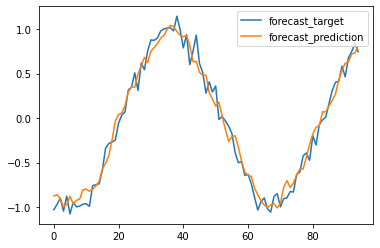

In [25]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

In [26]:
# Forecast future values (use only self-predictions for making future predictions)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [27]:
print(validation_target)

[-1.03006892 -0.97054802 -0.90002603 -1.04537815 -0.87775016 -1.07687349
 -0.94765871 -0.99767347 -0.98854811 -0.96746258 -0.96187321 -0.99150454
 -0.75915849 -0.74770433 -0.73881128 -0.58667411 -0.33705834 -0.28516384
 -0.26857254 -0.24787451 -0.05842074  0.0333968   0.06969565  0.31572135
  0.34596613  0.50865344  0.31097853  0.61851735  0.54235549  0.75577906
  0.8775509   0.87305775  0.89903941  0.97723233  1.00193924  1.01021774
  1.01596678  0.97895609  1.1438837   0.99484472  0.78793536  0.9360514
  0.60067947  0.75080055  0.9321098   0.6127353   0.51062216  0.27931455
  0.40712242  0.29358277  0.36065506 -0.01552232  0.01512626 -0.03168701
 -0.09055745 -0.17180865 -0.38750148 -0.50198593 -0.48808333 -0.6440842
 -0.63195026 -0.7390351  -0.88836416 -1.03324726 -0.93921039 -0.89717663
 -1.02200496 -1.0561271  -0.87972227 -0.84889081 -0.99788438 -0.90537247
 -0.8969171  -0.8256215  -0.83107574 -0.63606335 -0.60384074 -0.42549704
 -0.3923438  -0.47389083 -0.19848861 -0.30347237 -0.0

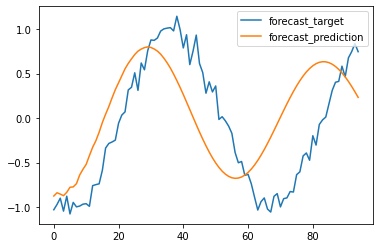

In [20]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()